In [1]:
import json
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.font_manager as fm
import IPython.display as disp

# 그래프 스타일
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
# 폰트 경로 지정
font_path = '../src/KoPubWorld Batang Medium.ttf'

# matplotlib에 폰트 등록
fm.fontManager.addfont(font_path)

# 폰트 이름 확인
prop = fm.FontProperties(fname=font_path)
font_name = prop.get_name()
print(f"matplotlib에 등록된 폰트 이름: {font_name}")

# matplotlib의 기본 폰트 설정
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

matplotlib에 등록된 폰트 이름: KoPubWorldBatang


In [3]:
file_path = "../output/dataset_1.json"

# total lines 미리 세기 (tqdm 활용)
with open(file_path, 'r', encoding='utf-8') as f:
    total_lines = sum(1 for _ in f)

data = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in tqdm(f, total=total_lines, desc="Loading"):
        data.append(json.loads(line))

df = pd.DataFrame(data)

Loading: 100%|██████████| 5069533/5069533 [00:26<00:00, 193228.81it/s]


In [4]:
print("데이터 크기:", df.shape)
print("\n컬럼 목록:\n", df.columns.tolist())
print("\n샘플 데이터:")
display(df.head())

데이터 크기: (5069533, 15)

컬럼 목록:
 ['review_id', 'user_id', 'business_id', 'review_stars', 'review_useful', 'text', 'date', 'user_review_count', 'user_useful', 'user_average_stars', 'city', 'state', 'business_stars', 'business_review_count', 'categories']

샘플 데이터:


,review_id,user_id,business_id,review_stars,review_useful,text,date,user_review_count,user_useful,user_average_stars,city,state,business_stars,business_review_count,categories
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,33,32,4.06,North Wales,PA,3.0,169,"Restaurants, Breakfast & Brunch, Food, Juice B..."
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,1332,1660,4.69,Tucson,AZ,3.5,47,"Restaurants, Breakfast & Brunch"
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,9,1,4.78,Philadelphia,PA,4.0,181,"Halal, Pakistani, Restaurants, Indian"
3,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,126,74,2.97,New Orleans,LA,4.0,32,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ..."
4,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31,4,5,2.00,Philadelphia,PA,4.0,273,"Mediterranean, Restaurants, Seafood, Greek"


In [5]:
# state와 city를 결합하여 새로운 컬럼 생성
df['state_city'] = df['state'] + ' - ' + df['city']

# 결합된 state_city 컬럼에 대한 빈도수 계산
state_city_counts = df['state_city'].value_counts()

# 비율 계산
total_count = len(df)
state_city_percentage = state_city_counts / total_count * 100

# 상위 20개 추출
top_20_state_city = state_city_counts.head(20)
top_20_percentage = state_city_percentage.head(20)

# 나머지 항목은 'etc'로 합치기
other_state_city = state_city_counts.tail(len(state_city_counts) - 20).sum()
other_percentage = state_city_percentage.tail(len(state_city_percentage) - 20).sum()

# 'etc'를 Series로 감싸기
other_state_city_series = pd.Series({'etc': other_state_city})
other_percentage_series = pd.Series({'etc': other_percentage})

# 결과 합치기
result = pd.concat([top_20_state_city, other_state_city_series])
percentage_result = pd.concat([top_20_percentage, other_percentage_series])

# 결과 출력
print("Top 20 state-city combinations:")
print(result)

Top 20 state-city combinations:
PA - Philadelphia         732008
LA - New Orleans          495176
TN - Nashville            344312
FL - Tampa                327245
IN - Indianapolis         273039
AZ - Tucson               267696
NV - Reno                 213168
MO - Saint Louis          192347
CA - Santa Barbara        180765
ID - Boise                 73076
AB - Edmonton              70774
FL - Clearwater            60095
FL - Saint Petersburg      57581
MO - St. Louis             49022
LA - Metairie              46182
NV - Sparks                42620
TN - Franklin              40349
FL - St. Petersburg        39141
DE - Wilmington            33542
FL - Brandon               32051
etc                      1499344
dtype: int64


In [6]:
print("Percentage of each state-city combination:")
print(percentage_result)

Percentage of each state-city combination:
PA - Philadelphia        14.439358
LA - New Orleans          9.767685
TN - Nashville            6.791789
FL - Tampa                6.455131
IN - Indianapolis         5.385881
AZ - Tucson               5.280486
NV - Reno                 4.204884
MO - Saint Louis          3.794176
CA - Santa Barbara        3.565713
ID - Boise                1.441474
AB - Edmonton             1.396065
FL - Clearwater           1.185415
FL - Saint Petersburg     1.135825
MO - St. Louis            0.966992
LA - Metairie             0.910971
NV - Sparks               0.840709
TN - Franklin             0.795912
FL - St. Petersburg       0.772083
DE - Wilmington           0.661639
FL - Brandon              0.632228
etc                      29.575584
dtype: float64


In [7]:
# 주별 개수 계산
state_counts = df['state'].value_counts()

# 주별 비율 계산
state_percentage = state_counts / len(df) * 100

# 결과 출력
print("State counts (Number of reviews per state):")
print(state_counts)

State counts (Number of reviews per state):
state
PA     1176504
FL      851457
LA      584475
TN      460515
MO      381605
IN      368361
AZ      286774
NV      259041
CA      235560
NJ      187433
ID      109900
AB       76112
DE       52343
IL       39382
NC          29
HI          19
CO          12
MT           6
XMS          5
Name: count, dtype: int64


In [8]:
print("State percentage (Percentage of reviews per state):")
print(state_percentage)

State percentage (Percentage of reviews per state):
state
PA     23.207345
FL     16.795571
LA     11.529168
TN      9.083973
MO      7.527419
IN      7.266172
AZ      5.656813
NV      5.109761
CA      4.646582
NJ      3.697244
ID      2.167853
AB      1.501361
DE      1.032501
IL      0.776837
NC      0.000572
HI      0.000375
CO      0.000237
MT      0.000118
XMS     0.000099
Name: count, dtype: float64


상관관계

<Axes: >

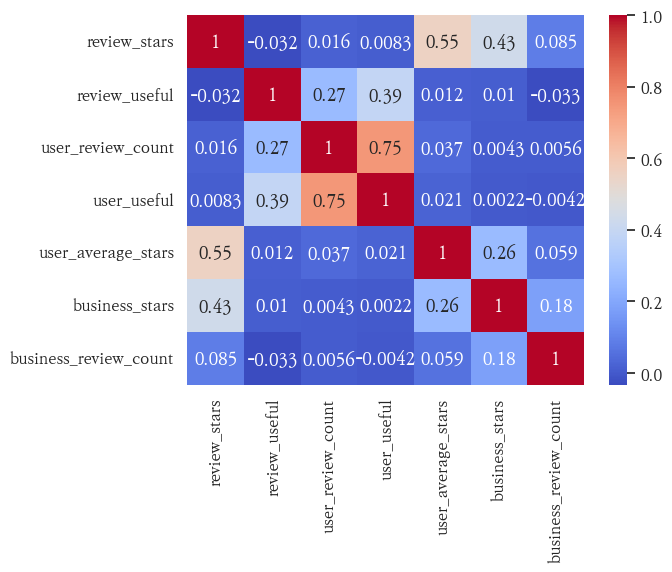

In [9]:
correlation_matrix = df[['review_stars', 'review_useful', 'user_review_count', 'user_useful', 'user_average_stars', 'business_stars', 'business_review_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')